## Exercise M2.01

The aim of this exercise is to make the following experiments:

    train and test a support vector machine classifier through cross-validation;
    study the effect of the parameter gamma of this classifier using a validation curve;
    use a learning curve to determine the usefulness of adding new samples in the dataset when building a classifier.

To make these experiments we first load the blood transfusion dataset.

Note

If you want a deeper overview regarding this dataset, you can refer to the Appendix - Datasets description section at the end of this MOOC.


In [1]:
import sklearn
print(sklearn.__version__)

1.3.2


In [9]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.model_selection import validation_curve, ValidationCurveDisplay
from sklearn.model_selection import learning_curve, LearningCurveDisplay

import matplotlib.pyplot as plt

In [3]:
blood_transfusion = pd.read_csv("/content/drive/MyDrive/DataSets/Blood_transfusion/blood_transfusion.csv")
data = blood_transfusion.drop(columns="Class")
target = blood_transfusion["Class"]

Here we use a support vector machine classifier (SVM). In its most simple form, a SVM classifier is a linear classifier behaving similarly to a logistic regression. Indeed, the optimization used to find the optimal weights of the linear model are different but we don't need to know these details for the exercise.

Also, this classifier can become more flexible/expressive by using a so-called kernel that makes the model become non-linear. Again, no requirement regarding the mathematics is required to accomplish this exercise.

We will use an RBF kernel where a parameter gamma allows to tune the flexibility of the model.

First let's create a predictive pipeline made of:

    a sklearn.preprocessing.StandardScaler with default parameter;
    a sklearn.svm.SVC where the parameter kernel could be set to "rbf". Note that this is the default.

>

In [4]:
pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf'))

Evaluate the generalization performance of your model by cross-validation with a ShuffleSplit scheme. Thus, you can use sklearn.model_selection.cross_validate and pass a sklearn.model_selection.ShuffleSplit to the cv parameter. Only fix the random_state=0 in the ShuffleSplit and let the other parameters to the default.

In [5]:
cv = ShuffleSplit(random_state=0)

cv_results = cross_validate(pipeline, data, target, cv=cv, return_train_score=True)

print(f"Training scores: {cv_results['train_score']}")
print(f"Mean training accuracy: {cv_results['train_score'].mean()}")
print(f"Validation scores: {cv_results['test_score']}")
print(f"Mean validation accuracy: {cv_results['test_score'].mean()}")

Training scores: [0.78751857 0.79346211 0.78751857 0.78751857 0.77711738 0.79494799
 0.78306092 0.79197623 0.8038633  0.79494799]
Mean training accuracy: 0.7901931649331352
Validation scores: [0.68       0.74666667 0.78666667 0.8        0.74666667 0.78666667
 0.8        0.82666667 0.74666667 0.73333333]
Mean validation accuracy: 0.7653333333333334


As previously mentioned, the parameter gamma is one of the parameters controlling under/over-fitting in support vector machine with an RBF kernel.

Evaluate the effect of the parameter gamma by using sklearn.model_selection.ValidationCurveDisplay. You can leave the default scoring=None which is equivalent to scoring="accuracy" for classification problems. You can vary gamma between 10e-3 and 10e2 by generating samples on a logarithmic scale with the help of np.logspace(-3, 2, num=30).

Since we are manipulating a Pipeline the parameter name is svc__gamma instead of only gamma. You can retrieve the parameter name using model.get_params().keys(). We will go more into detail regarding accessing and setting hyperparameter in the next section.


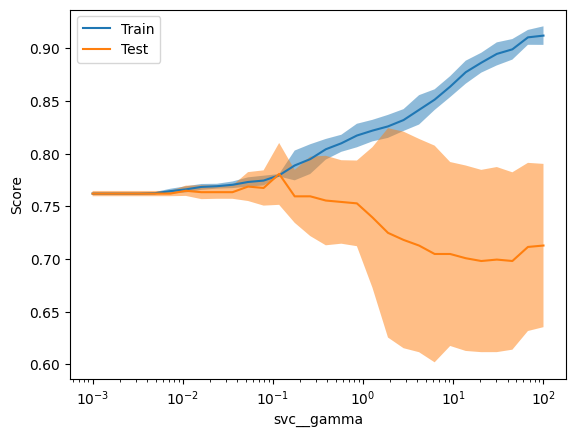

In [8]:
gamma_range = np.logspace(-3, 2, num=30)

train_scores, test_scores = validation_curve(
    pipeline, data, target, param_name="svc__gamma", param_range=gamma_range,
    cv=5, scoring=None, n_jobs=-1)

ValidationCurveDisplay.from_estimator(
    pipeline, data, target, param_name="svc__gamma", param_range=gamma_range,
    cv=5, scoring=None, n_jobs=-1)
plt.xscale('log')
plt.show()

Now, you can perform an analysis to check whether adding new samples to the dataset could help our model to better generalize. Compute the learning curve (using sklearn.model_selection.LearningCurveDisplay) by computing the train and test scores for different training dataset size. Plot the train and test scores with respect to the number of samples.

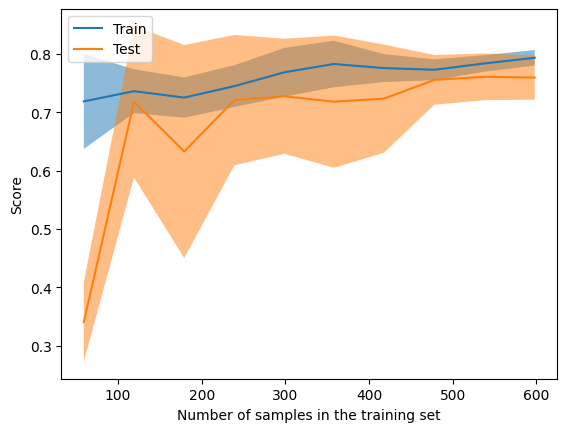

In [10]:
train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
    pipeline, data, target, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10),
    return_times=True)

LearningCurveDisplay.from_estimator(
    pipeline, data, target, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
plt.show()